## Bike Price Prediction Using Linear Regression

## 1.Importing the Libraries

In [81]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 2.Importing the Dataset

In [82]:
df = pd.read_csv('F:\YBI Foundation\Dataset-main/Bike Prices.csv')

In [83]:
df.head(3)

,Brand,Model,Selling_Price,Year,Seller_Type,Owner,KM_Driven,Ex_Showroom_Price
0,TVS,TVS XL 100,30000,2017,Individual,1st owner,8000,30490.0
1,Bajaj,Bajaj ct 100,18000,2017,Individual,1st owner,35000,32000.0
2,Yo,Yo Style,20000,2011,Individual,1st owner,10000,37675.0


## 3. Understanding the Data

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              1061 non-null   object 
 1   Model              1061 non-null   object 
 2   Selling_Price      1061 non-null   int64  
 3   Year               1061 non-null   int64  
 4   Seller_Type        1061 non-null   object 
 5   Owner              1061 non-null   object 
 6   KM_Driven          1061 non-null   int64  
 7   Ex_Showroom_Price  626 non-null    float64
dtypes: float64(1), int64(3), object(4)
memory usage: 66.4+ KB


In [85]:
df.isnull().sum()

Brand                  0
Model                  0
Selling_Price          0
Year                   0
Seller_Type            0
Owner                  0
KM_Driven              0
Ex_Showroom_Price    435
dtype: int64

## Dropping Missing values for no issues in further

In [86]:
df = df.dropna()

In [87]:
df.isnull().sum()

Brand                0
Model                0
Selling_Price        0
Year                 0
Seller_Type          0
Owner                0
KM_Driven            0
Ex_Showroom_Price    0
dtype: int64

# 4.Now lets just see the Summary Statistics of the Continuous variables

In [88]:
df.describe()

,Selling_Price,Year,KM_Driven,Ex_Showroom_Price
count,626.000000,626.000000,626.000000,6.260000e+02
mean,59445.164537,2014.800319,32671.576677,8.795871e+04
std,59904.350888,3.018885,45479.661039,7.749659e+04
min,6000.000000,2001.000000,380.000000,3.049000e+04
25%,30000.000000,2013.000000,13031.250000,5.485200e+04
50%,45000.000000,2015.000000,25000.000000,7.275250e+04
75%,65000.000000,2017.000000,40000.000000,8.703150e+04
max,760000.000000,2020.000000,585659.000000,1.278000e+06


## 5. Let's see the Counts and Categories in Categorical variables

In [89]:
df[['Brand']].value_counts()

Brand   
Honda       170
Bajaj       143
Hero        108
Yamaha       94
Royal        40
TVS          23
Suzuki       18
KTM           6
Mahindra      6
Kawasaki      4
UM            3
Activa        3
Harley        2
Vespa         2
BMW           1
Hyosung       1
Benelli       1
Yo            1
dtype: int64

In [90]:
df[['Model']].value_counts()

Model                                     
Honda Activa [2000-2015]                      23
Honda CB Hornet 160R                          22
Bajaj Pulsar 180                              20
Yamaha FZ S V 2.0                             16
Bajaj Discover 125                            16
                                              ..
Royal Enfield Thunderbird 500                  1
Royal Enfield Continental GT [2013 - 2018]     1
Royal Enfield Classic Stealth Black            1
Royal Enfield Classic Squadron Blue            1
Yo Style                                       1
Length: 183, dtype: int64

In [91]:
df[['Seller_Type']].value_counts()

Seller_Type
Individual     623
Dealer           3
dtype: int64

In [92]:
df[['Owner']].value_counts()

Owner    
1st owner    556
2nd owner     66
3rd owner      3
4th owner      1
dtype: int64

## 6.Let's have all the column names at one place

In [93]:
df.columns

Index(['Brand', 'Model', 'Selling_Price', 'Year', 'Seller_Type', 'Owner',
       'KM_Driven', 'Ex_Showroom_Price'],
      dtype='object')

## 7.Let's see the shape of the Dataset

In [94]:
df.shape

(626, 8)

## 8.Label Encoding 

In [95]:
df.replace({'Seller_Type':{'Individual':0,'Dealer':1}},inplace = True)

In [96]:
df.head(5)

,Brand,Model,Selling_Price,Year,Seller_Type,Owner,KM_Driven,Ex_Showroom_Price
0,TVS,TVS XL 100,30000,2017,0,1st owner,8000,30490.0
1,Bajaj,Bajaj ct 100,18000,2017,0,1st owner,35000,32000.0
2,Yo,Yo Style,20000,2011,0,1st owner,10000,37675.0
3,Bajaj,Bajaj Discover 100,25000,2010,0,1st owner,43000,42859.0
4,Bajaj,Bajaj Discover 100,24999,2012,0,2nd owner,35000,42859.0


In [97]:
df.replace({'Owner':{'1st owner':0,'2nd owner':1,'3rd owner':2,'4th owner':3}},inplace = True)

In [98]:
df.head(5)

,Brand,Model,Selling_Price,Year,Seller_Type,Owner,KM_Driven,Ex_Showroom_Price
0,TVS,TVS XL 100,30000,2017,0,0,8000,30490.0
1,Bajaj,Bajaj ct 100,18000,2017,0,0,35000,32000.0
2,Yo,Yo Style,20000,2011,0,0,10000,37675.0
3,Bajaj,Bajaj Discover 100,25000,2010,0,0,43000,42859.0
4,Bajaj,Bajaj Discover 100,24999,2012,0,1,35000,42859.0


## 9. Define y(Dependent) and x(Independent) for the prediction 

## So our object is to predict the Prices 

In [99]:
y = df['Selling_Price']

In [100]:
y.shape

(626,)

In [101]:
y.head(2)

0    30000
1    18000
Name: Selling_Price, dtype: int64

In [102]:
df.columns

Index(['Brand', 'Model', 'Selling_Price', 'Year', 'Seller_Type', 'Owner',
       'KM_Driven', 'Ex_Showroom_Price'],
      dtype='object')

In [103]:
X = df[['Year','Seller_Type','Owner','KM_Driven','Ex_Showroom_Price']]

In [104]:
X.shape

(626, 5)

In [105]:
X.head(5)

,Year,Seller_Type,Owner,KM_Driven,Ex_Showroom_Price
0,2017,0,0,8000,30490.0
1,2017,0,0,35000,32000.0
2,2011,0,0,10000,37675.0
3,2010,0,0,43000,42859.0
4,2012,0,1,35000,42859.0


## 10. Now Let's Split the data for Training and Testing

In [106]:
from sklearn.model_selection import train_test_split

In [107]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 2529)

In [108]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((438, 5), (188, 5), (438,), (188,))

## 11. Importing the Model and Train the Model 

In [109]:
from sklearn.linear_model import LinearRegression

In [110]:
model = LinearRegression()

In [111]:
model

LinearRegression()

In [112]:
model.fit(X_train,y_train)

LinearRegression()

## 12.Get the prediction 

In [113]:
y_pred = model.predict(X_test)

In [114]:
y_pred.shape

(188,)

In [115]:
y_pred

array([ 27210.52271467,  56340.0833516 ,  63471.94672   ,  53627.63844784,
        55612.75744267,  53888.92259716,  33751.352751  ,  60311.49501775,
       113713.05684465,  76639.49332948,  27826.73993813,  49919.83255838,
        65886.64311457,  26755.1266407 ,  48277.75426036, 127646.56079332,
        70047.10661637,  39350.67963649,  36081.03597878,  45360.79436333,
        48079.89470576,  44803.02464795,  55161.44026111,  71041.51821317,
        91689.22699154,  49301.5359465 ,  55988.19326247, 108171.54600296,
        32771.06897894,  25468.20073012,  17128.61806159, 179271.41130735,
        45698.99857629,  31371.09285074,  67886.52106729,  41492.49575813,
        56855.22238601,  47820.47003471,  74682.14053956,  24984.21822742,
        55374.00513696,  41412.36775223,  67991.60287764,  26553.59421842,
        89788.69870686,  45764.83633684, 133888.03770385, 106988.11382496,
        71176.4066771 ,  25332.25485948,  79512.43778823,  63914.3808817 ,
        28632.12110984,  

## 13. Evaluation of Trained Model

In [116]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [117]:
mean_squared_error(y_test,y_pred)

554715615.5048043

In [118]:
mean_absolute_error(y_test,y_pred)

12225.737010419696

In [119]:
r2_score(y_test,y_pred)

0.8810414402983999

## 14.Visualization of the actual and the predicted prices

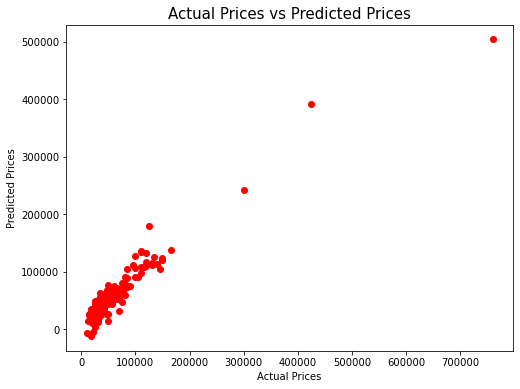

In [133]:
plt.figure(figsize = (8,6))
plt.scatter(y_test,y_pred,c = 'red')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices',fontsize = 15)
plt.show()

## 15.Getting Future predictions

In [134]:
df_new = df.sample(1)

In [135]:
df_new

,Brand,Model,Selling_Price,Year,Seller_Type,Owner,KM_Driven,Ex_Showroom_Price
424,Yamaha,Yamaha FZ S V 2.0,60000,2015,0,1,17500,84042.0


In [136]:
df_new.shape

(1, 8)

In [146]:
x_new = df_new.drop(['Brand',"Model",'Selling_Price'],axis = 1)

In [147]:
x_new.shape

(1, 5)

In [148]:
x_new.head(5)

,Year,Seller_Type,Owner,KM_Driven,Ex_Showroom_Price
424,2015,0,1,17500,84042.0


In [149]:
y_pred_new = model.predict(x_new)

In [150]:
y_pred_new

array([53321.01447911])

## 16.Our model accuracy was 88.1 % from R squared Evaluation